<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Encounters-that-have-too-many-NA" data-toc-modified-id="Encounters-that-have-too-many-NA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Encounters that have too many NA</a></span></li><li><span><a href="#Examine-some-attributes" data-toc-modified-id="Examine-some-attributes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Examine some attributes</a></span></li><li><span><a href="#drop-some-unnecessary-attributes" data-toc-modified-id="drop-some-unnecessary-attributes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>drop some unnecessary attributes</a></span></li><li><span><a href="#Determine-NA-tolerance" data-toc-modified-id="Determine-NA-tolerance-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Determine NA tolerance</a></span></li><li><span><a href="#Remove-attributes-with->50%-NA" data-toc-modified-id="Remove-attributes-with->50%-NA-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Remove attributes with &gt;50% NA</a></span></li><li><span><a href="#Drop-attributes->20%-&amp;->30%" data-toc-modified-id="Drop-attributes->20%-&amp;->30%-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Drop attributes &gt;20% &amp; &gt;30%</a></span></li><li><span><a href="#Save-the-filtered-admission-dataset" data-toc-modified-id="Save-the-filtered-admission-dataset-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Save the filtered admission dataset</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pd.options.display.max_rows = 400
pd.options.display.max_columns = 50

In [2]:
%cd /Users/jinchenxie/Desktop/datasets/processed

/Users/jinchenxie/Desktop/datasets/processed


In [3]:
admission = pd.read_excel('VAD potential cohort admissions V2.xlsx', 
                          'cohort admission')

In [4]:
%cd ~/desktop/HF_Research/datasets/processed
baseline_trunc30 = pd.read_excel('Filtered Attributes Baseline.xlsx', 'NA30_filtered_baseline')

[Errno 2] No such file or directory: '/Users/jinchenxie/desktop/HF_Research/datasets/processed'
/Users/jinchenxie/Desktop/datasets/processed


In [5]:
admission = admission[admission['admission_count']<=15]

In [6]:
admission.shape

(13414, 170)

# Encounters that have too many NA

In [7]:
admission_NA = []
for i in range(len(admission.index)) :
    admission_NA.append(admission.iloc[i].isna().sum()/(len(admission.iloc[0])-1))
#     print("rID", baseline.iloc[i,0] , " : " ,  baseline.iloc[i].isnull().sum()/(len(baseline.iloc[0])-1))

In [8]:
for j in [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3]:
    temp_list = [i for i in admission_NA if i>j]
    print('More than', j*100, "% NA: ", len(temp_list))

More than 90.0 % NA:  0
More than 80.0 % NA:  0
More than 70.0 % NA:  0
More than 60.0 % NA:  87
More than 50.0 % NA:  973
More than 40.0 % NA:  8419
More than 30.0 % NA:  12643


In [9]:
# encounters index for encounters who have more than 50% missing values
[index for index,i in enumerate(admission_NA) if i>0.6]

[134,
 312,
 476,
 806,
 873,
 1306,
 1367,
 1443,
 1450,
 1455,
 1651,
 1662,
 1808,
 1924,
 1980,
 2075,
 2187,
 2480,
 2799,
 2896,
 2992,
 3332,
 3358,
 3533,
 3709,
 3805,
 3958,
 3983,
 4320,
 4381,
 4382,
 4602,
 4624,
 4678,
 4813,
 4858,
 4892,
 4986,
 4990,
 5194,
 5513,
 5786,
 5818,
 5940,
 6221,
 6326,
 7746,
 8325,
 8697,
 8797,
 8799,
 9213,
 9269,
 9397,
 9398,
 9428,
 9483,
 9566,
 9585,
 9599,
 9886,
 9941,
 10135,
 10149,
 10251,
 10263,
 10331,
 10407,
 10733,
 10757,
 10803,
 11213,
 11227,
 11322,
 11444,
 11528,
 11741,
 12046,
 12191,
 12253,
 12846,
 12893,
 13079,
 13087,
 13155,
 13187,
 13194]

# Examine some attributes

In [10]:
admission['PATIENT_TYPE_CODE'].value_counts()

I     12994
S       398
E        20
DO        2
Name: PATIENT_TYPE_CODE, dtype: int64

In [11]:
admission['PATIENT_TYPE_CODE'].value_counts()

I     12994
S       398
E        20
DO        2
Name: PATIENT_TYPE_CODE, dtype: int64

In [12]:
admission['PATIENT_TYPE_DESCRIPTION'].value_counts()

I  INPATIENT        12994
S  SAME DAY SERV      398
EMERGENCY DEPT         20
DO DIRECT OBS           2
Name: PATIENT_TYPE_DESCRIPTION, dtype: int64

In [13]:
admission['PATIENT_TYPE_GROUP'].value_counts()

IP ACUTE            12994
SAME DAY SERVICE      398
EMERGENCY              20
DIRECT OBS ADMIT        2
Name: PATIENT_TYPE_GROUP, dtype: int64

In [14]:
admission['ADMISSION_SOURCE'].value_counts()

MEDICAL REFERRAL      11566
HOSPITAL TRANSFER      1555
TRANS FRM SNF/ICF       188
CLINIC REFERRAL          46
XFER OTH HLTH CR F       37
NON STAFF REFERRAL       10
XFER FRM AC SAME H        7
PGH CANCER INSTITU        5
Name: ADMISSION_SOURCE, dtype: int64

In [15]:
admission['RHC_FOUND'].value_counts()

0    12221
1     1193
Name: RHC_FOUND, dtype: int64

In [16]:
admission['PRIMARY_DIAGNOSIS_CODE'].value_counts()

428.23    971
428.0     939
I13.0     683
I50.23    521
428.43    459
         ... 
112.84      1
359.9       1
599.71      1
M34.9       1
C64.1       1
Name: PRIMARY_DIAGNOSIS_CODE, Length: 1613, dtype: int64

In [17]:
admission['PRIMARY_DIAGNOSIS_CODE_TYPE'].value_counts()

9     6903
10    6511
Name: PRIMARY_DIAGNOSIS_CODE_TYPE, dtype: int64

In [18]:
admission['PRIMARY_DIAGNOSIS_DESCRIPTION'].value_counts()

AC-CHR SYSTOL HRT FAIL                                         971
CONGESTVE HRT FAILUR NOS                                       939
HYP HRT & CHR KDNY DIS W HRT FAIL AND STG 1-4/UNSP CHR KDNY    683
ACUTE ON CHRONIC SYSTOLIC (CONGESTIVE) HEART FAILURE           521
AC-CHR COMB S/D HRT FAIL                                       459
                                                              ... 
OTHER GASTRITIS WITH BLEEDING                                    1
CRYST ARTHROP NEC-MULT                                           1
DEGENERATIVE SKIN DISORD                                         1
POSTPROC HEMATOMA OF A MS STRUCTURE FOL OTHER PROCEDURE          1
UNSPECIFIED INJURY OF URETHRA, INITIAL ENCOUNTER                 1
Name: PRIMARY_DIAGNOSIS_DESCRIPTION, Length: 1588, dtype: int64

# drop some unnecessary attributes

In [19]:
drop_attri = ['FINANCIAL_CLASS_CODE','FINANCIAL_CLASS','HOSP_ROLLUP_GROUPING1',
             'HOSP_ROLLUP_GROUPING2','HOSPITAL','PATIENT_TYPE_CODE',
             'PATIENT_TYPE_GROUP']

In [20]:
admission_trunc = admission.drop(columns=drop_attri)

# Determine NA tolerance

In [21]:
cutoffs = np.arange(11,41,1)/100

In [22]:
cutoffs_broad = np.arange(1,51,1)/100

In [23]:
admission_na_series = admission_trunc.isna().sum()/admission_trunc.shape[0]

In [24]:
num_attri_remain = []
for i in cutoffs:
    num_attri_remain.append(admission_trunc.shape[1]-
                            len(admission_na_series[admission_na_series>=i]))

In [25]:
num_attri_remain_broad = []
for i in cutoffs_broad:
    num_attri_remain_broad.append(admission_trunc.shape[1]-
                                  len(admission_na_series[admission_na_series>=i]))

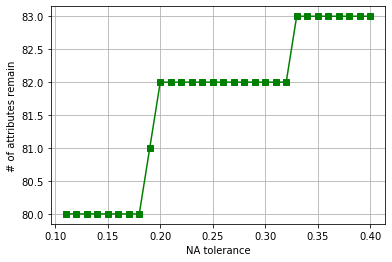

In [26]:
plt.plot(cutoffs, num_attri_remain,'s-',color = 'g',label="NA proportion")
plt.xlabel("NA tolerance")
plt.ylabel("# of attributes remain")
plt.grid()
plt.savefig('/Users/jinchenxie/Desktop/HF_Research/Plots/admission_NA_cutoffs')
plt.show()

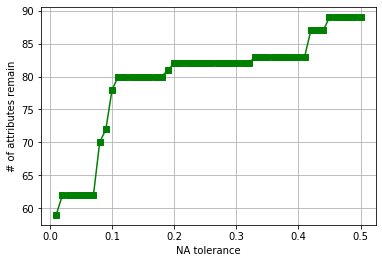

In [27]:
plt.plot(cutoffs_broad, num_attri_remain_broad,'s-',color = 'g',label="NA proportion")
plt.xlabel("NA tolerance")
plt.ylabel("# of attributes remain")
plt.grid()
plt.savefig('/Users/jinchenxie/Desktop/HF_Research/Plots/broader_admission_NA_cutoffs')
plt.show()

In [28]:
cutoffs = np.arange(18,30)/100

In [29]:
for i in range(len(cutoffs)-1):
    na_attri_s = admission_na_series[admission_na_series>=cutoffs[i]].index
    na_attri_l = admission_na_series[admission_na_series>=cutoffs[i+1]].index
    na_s_l = [i for i in na_attri_s if i not in na_attri_l]
    print(cutoffs[i], 'to', cutoffs[i+1],':', na_s_l)

0.18 to 0.19 : ['READMISSION_DAYS']
0.19 to 0.2 : ['HOSP_INR']
0.2 to 0.21 : []
0.21 to 0.22 : []
0.22 to 0.23 : []
0.23 to 0.24 : []
0.24 to 0.25 : []
0.25 to 0.26 : []
0.26 to 0.27 : []
0.27 to 0.28 : []
0.28 to 0.29 : []


In [30]:
cutoffs = [0.19, 0.2, 0.21, 0.32, 0.33, 0.42, 0.43,0.44, 0.45,0.46]

In [31]:
for i in range(len(cutoffs)-1):
    na_attri_s = admission_na_series[admission_na_series>=cutoffs[i]].index
    na_attri_l = admission_na_series[admission_na_series>=cutoffs[i+1]].index
    na_s_l = [i for i in na_attri_s if i not in na_attri_l]
    print(cutoffs[i], 'to', cutoffs[i+1],':', na_s_l)

0.19 to 0.2 : ['HOSP_INR']
0.2 to 0.21 : []
0.21 to 0.32 : []
0.32 to 0.33 : ['HOSP_BILI']
0.33 to 0.42 : ['INR', 'INR_DAYS', 'HOSPITAL_MELD', 'MELD_EST_MORTALITY']
0.42 to 0.43 : []
0.43 to 0.44 : []
0.44 to 0.45 : ['ALBUMIN', 'ALBUMIN_DAYS']
0.45 to 0.46 : []


# Remove attributes with >50% NA

In [32]:
drop_attris_50 = list(admission_na_series[admission_na_series>=0.50].index)

In [33]:
len(drop_attris_50)

74

In [34]:
drop_attris_50

['DC_MILRINONE',
 'DC_DOBUTAMINE',
 'DC_DOPAMINE',
 'LVEF',
 'CLOSEST_LVEF_DAYS',
 'RV_FUNC',
 'CLOSEST_RV_FUNC_DAYS',
 'AR',
 'CLOSEST_AR_DAYS',
 'MR',
 'CLOSEST_MR_DAYS',
 'PR',
 'CLOSEST_PR_DAYS',
 'TR',
 'CLOSEST_TR_DAYS',
 'AS',
 'CLOSEST_AS_DAYS',
 'MS',
 'CLOSEST_MS_DAYS',
 'PS',
 'CLOSEST_PS_DAYS',
 'TS',
 'CLOSEST_TS_DAYS',
 'CABG_DAYS',
 'TAVR_DAYS',
 'SAVR_MECH_DAYS',
 'SAVR_BIO_DAYS',
 'SURG_AO_GRFT_DAYS',
 'ENDO_AO_GRFT_DAYS',
 'AO_VLV_REPAIR_DAYS',
 'SMVR_DAYS',
 'SPVR_DAYS',
 'STVR_DAYS',
 'POST_VAD_DAYS',
 'POST_TRANSPLANT_DAYS',
 'HEMOGLOBIN_A1C',
 'HEMOGLOBIN_A1C_DAYS',
 'CHOLESTEROL',
 'CHOLESTEROL_DAYS',
 'LDL',
 'LDL_DAYS',
 'HDL',
 'HDL_DAYS',
 'TRIGLYCERIDE',
 'TRIGLYCERIDE_DAYS',
 'PREALBUMIN',
 'PREALBUMIN_DAYS',
 'BUN',
 'BUN_DAYS',
 'BNP',
 'BNP_DAYS',
 'BILI',
 'BILI_DAYS',
 'RA_MEAN_PRESSURE',
 'RA_MEAN_PRESSURE_DAYS',
 'THERMAL_CARDIAC_INDEX',
 'THERMAL_CARDIAC_INDEX_DAYS',
 'FICK_CARDIAC_INDEX',
 'FICK_CARDIAC_INDEX_DAYS',
 'PA_SATURATION',
 'PA_SATURATIO

In [35]:
procedure_days = ['CABG_DAYS',
 'TAVR_DAYS',
 'SAVR_MECH_DAYS',
 'SAVR_BIO_DAYS',
 'SURG_AO_GRFT_DAYS',
 'ENDO_AO_GRFT_DAYS',
 'AO_VLV_REPAIR_DAYS',
 'SMVR_DAYS',
 'SPVR_DAYS',
 'STVR_DAYS',
 'POST_VAD_DAYS',
 'POST_TRANSPLANT_DAYS',
 'PCI_DAYS',
 'IMPELLA_DAYS',
 'IABP_DAYS',
 'ECMO_DAYS',
 'ABLATION_DAYS',
 'PACEMAKER_IMPLANT_DAYS',
 'ICD_IMPLANT_DAYS',
 'BIV_ICD_IMPLANT_DAYS',
 'CRT_IMPLANT_DAYS' ]

In [36]:
for i in procedure_days:
    drop_attris_50.remove(i)

In [37]:
len(drop_attris_50)

53

In [38]:
admission_trunc.drop(columns = drop_attris_50, inplace=True)

In [39]:
admission_trunc.shape

(13414, 110)

In [40]:
admission_na_trunc_series = admission_trunc.isna().sum()/admission_trunc.shape[0]

# Drop attributes >20% & >30%

In [41]:
drop_attris_20 = list(admission_na_trunc_series[(admission_na_trunc_series>0.20)
                                               &(admission_na_trunc_series<0.50)].index)

In [42]:
drop_attris_20

['HOSP_BILI',
 'ALBUMIN',
 'ALBUMIN_DAYS',
 'INR',
 'INR_DAYS',
 'HOSPITAL_MELD',
 'MELD_EST_MORTALITY']

In [43]:
drop_attris_20.pop(0)

'HOSP_BILI'

In [44]:
drop_attris_20

['ALBUMIN',
 'ALBUMIN_DAYS',
 'INR',
 'INR_DAYS',
 'HOSPITAL_MELD',
 'MELD_EST_MORTALITY']

In [45]:
drop_attris_30 = list(admission_na_trunc_series[(admission_na_trunc_series>=0.30)
                                               &(admission_na_trunc_series<0.50)].index)

In [46]:
drop_attris_30

['HOSP_BILI',
 'ALBUMIN',
 'ALBUMIN_DAYS',
 'INR',
 'INR_DAYS',
 'HOSPITAL_MELD',
 'MELD_EST_MORTALITY']

In [47]:
admission_trunc.drop(columns = drop_attris_30, inplace=True)

In [48]:
admission_trunc.shape

(13414, 103)

In [49]:
len(admission_na_trunc_series[admission_na_trunc_series<=0.20].index)

82

# Save the filtered admission dataset

In [50]:
%cd ~/desktop/datasets/processed

/Users/jinchenxie/Desktop/datasets/processed


In [52]:
writer = pd.ExcelWriter('Filtered Attributes Admission v2.xlsx')
admission_trunc.to_excel(writer, 'NA30_filtered_admission', index=False)
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.
